# Métodos simpléticos

Para finalizar a série de métodos numéricos, agora serão tratados os _métodos simpléticos_. Os métodos simpléticos consistem num conjunto de métodos de integração voltados para sistemas mecânicos conservativos, pois fundamentam-se na estrutura dos chamados _espaços simpléticos_. Isto exige uma pequena introdução.

## Mecânica

Considere um sistema de $N$ partículas de massas $m_i > 0$, $i=1,2,...,N$, posições $\vec r(t) = (\vec r_1(t), ..., \vec r_N(t))$ e velocidades $\vec v(t) = (\vec v_1(t), ..., \vec v_N(t))$, sob um campo de forças $\vec F(t, \vec r(t)) = (\vec F_1(t, \vec r(t)), ..., \vec F_N(t), \vec r(t))$. A Segunda Lei de Newton oferece o seguinte sistema de equações diferenciais ordinárias que representam o movimento em tal sistema:
\begin{equation}
  \begin{cases}
      \dot{\vec r}_i(t) = \vec v_i(t), \\
      \dot{\vec v}_i(t) = \vec F_i(t, \vec r(t)) / m_i
  \end{cases}
  i = 1, 2, ..., N.
\end{equation}

A energia total do sistema é uma função $H$ dada por
\begin{equation}
  H(\vec r(t), \vec v(t)) = T(\vec v(t)) + T(\vec r(t)),
\end{equation}
onde $T$ é a energia cinética e $V$ a energia potencial, dados tais que
\begin{equation}
  T(\vec v(t)) = \sum_{i=1}^{N} \dfrac{m_i || \vec v_i(t) ||^2}{2}, \quad \quad - \nabla_{\vec r} V(\vec r(t)) = F (t, \vec r(t)).
\end{equation}

Hamilton percebeu que, por algumas razões, é possível escrever as equações de movimento em função da energia total, que nesse caso é uma função chamada _Hamiltoniano_:
\begin{equation}
  \begin{cases}
    \vec r_i(t) = \dfrac{\partial H}{\partial p_i} (t, \vec r(t), \vec p(t)), \\ \\
    \vec p_i(t) = - \dfrac{\partial H}{\partial r_i} (t, \vec r(t), \vec p(t)),
  \end{cases}
\end{equation}
onde $\vec p(t) = (\vec p_1(t), ..., \vec p_N(t))$ é o _momento linear_, dado por $\vec p_i(t) = m_i \vec v_i(t)$.

Também por algumas razões, definimos o operador _colchete de Poisson_ como
\begin{equation}
  \{F, G\} = \sum_{i=1}^{3} \left(\dfrac{\partial F}{\partial \vec r^{(i)}} \dfrac{\partial G}{\partial \vec p^{(i)}} - \dfrac{\partial F}{\partial \vec p^{(i)}} \dfrac{\partial G}{\partial \vec r^{(i)}} \right).
\end{equation}

Veja que nesse caso podemos reescrever as equações de movimento como:
\begin{equation}
  \begin{cases}
    \vec r_i(t) = \{H, \vec r\}(t), \\
    \vec p_i(t) = \{H, \vec p\}(t),
  \end{cases}
\end{equation}
ou ainda, vetorialmente:
\begin{equation}
  \vec z(t) = \bm J^{-1} \nabla H(\vec r(t), \vec p(t)), \quad \quad \bm J = \begin{bmatrix}\bm 0 & \bm I \\ - \bm I & \bm 0\end{bmatrix}, \quad \quad \vec z(t) = (\vec r(t), \vec p(t)).
\end{equation}

Chegando finalmente no que significa ser simplético, o colchete de Poisson é uma 2-forma diferencial $\omega^2$, e um espaço simplético é um par $(E, \omega^2)$, onde $E$ é um conjunto. Se uma aplicação $\psi(\vec r, \vec p) = (\tilde{\vec r}(t), \tilde{\vec p}(t))$ for tal que
\begin{equation}
  \psi'(\vec r, \vec p) \bm J \psi (\vec r, \vec p) = \bm J,
\end{equation}
onde $\psi'(\vec r, \vec p)$ é a matriz jacobiana da aplicação, então dizemos que se trata de um _simplectomorfismo_, pois equivale a dizer, numa notação bonita de formas diferenciais:
\begin{equation}
  d \vec p \wedge d \vec r = d \tilde{\vec p} \wedge d \tilde{\vec r}.
\end{equation}

---

## Integradores numéricos simpléticos

A ideia por trás dos métodos simpléticos então é que a aplicação $\psi$ seja não apenas um difeomorfismo, mas um simplectomorfismo, ou seja, que atenda a condição matricial dada.

Um exemplo de método é o método de _Velocity-Verlet_ (VV).

### Velocity-Verlet

No problema de valor inicial dado pelas equações de movimento de Newton, temos que:
\begin{align*}
  \vec r_{k+1} &= \vec r_k + h \vec v_k + \dfrac{h^2}{2} \vec F (\vec r_k) \\
  \vec v_{k+1} &= \vec v_k + \dfrac{h}{2} (\vec F(\vec r_k) + \vec F(\vec r_{k+1})).
\end{align*}

> Recomendo fazer as contas para verificar que trata-se, de fato, de um método simplético.

De toda forma, vamos aplicá-lo em Python:

In [1]:
def velocity_verlet_passo (m:float, r0, v0, F, h:float):
  Fi = F(m,r0)
  r = r0 + h * v0 + h**2 * Fi / 2
  v = v0 + (h/2) * (Fi + F(m,r))
  return r, v

def velocity_verlet (m:float, r0, v0, F, n:int, t0, tf):
  r_k, v_k = [r0], [v0]
  h = (tf - t0)/n
  rk, vk = r0, v0
  for _ in range(n):
    rk, vk = velocity_verlet_passo(m, rk, vk, F, h)
    r_k.append(rk)
    v_k.append(vk)
  return list(zip(*r_k)), list(zip(*v_k)) # n x N x 3 -> N x n x 3

Vamos usar no Problema de N-corpos em forma de lemniscata, no intervalo $[0,6.33]$ para poder comparar as trajetórias.

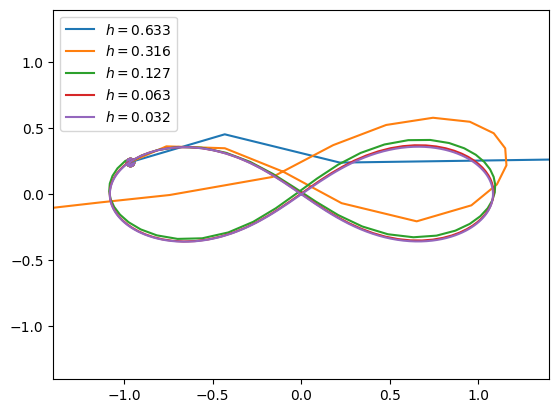

In [40]:
import matplotlib.pyplot as plt
from auxiliares.ncorpos import F_ncorpos, valores_iniciais_lemniscata
import numpy as np

m, r0, v0 = valores_iniciais_lemniscata()
t0, tf = 0, 6.3259

for n in [10, 20, 50, 100, 200]:
  h = (tf - t0)/n
  r_k, v_k = velocity_verlet(m, r0, v0, F_ncorpos, n, t0, tf)
  
  # Captura a posicao do primeiro corpo
  R = r_k[0]
  X,Y,Z = list(zip(*R)) # n x 3 -> 3 x n

  plt.scatter(X[0],Y[0])
  plt.plot(X,Y, label=f"$h={round(h,3)}$")

plt.xlim(-1.4,1.4)
plt.ylim(-1.4,1.4)
plt.legend()
plt.show()

Os métodos simpléticos são conhecidos por seu bom desempenho para grandes intervalos de tempo. Veja como fica a trajetória de um corpo mesmo com 1000 ciclos e um passo $h=0.1$:

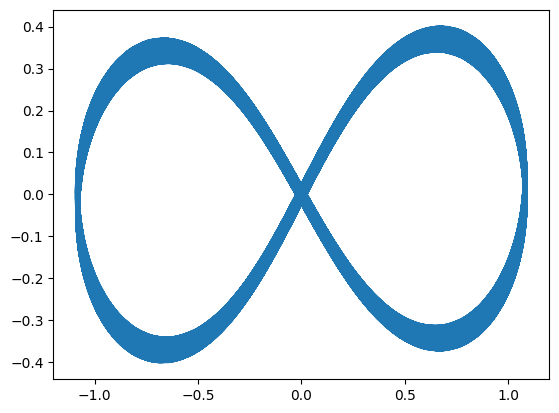

In [39]:
tf = 1000 * 6.3259
h = 0.1
n = int((tf - t0)/h)
r_k, v_k = velocity_verlet(m, r0, v0, F_ncorpos, n, t0, tf)

# Captura a posicao do primeiro corpo
R = r_k[0]
X,Y,Z = list(zip(*R)) # n x 3 -> 3 x n

plt.plot(X, Y, label=f"$h={h}$")
plt.scatter(X[0],Y[0],c="black")
plt.show()

---

# Mas é melhor mesmo?

Vamos comparar com o RK44 do outro notebook.

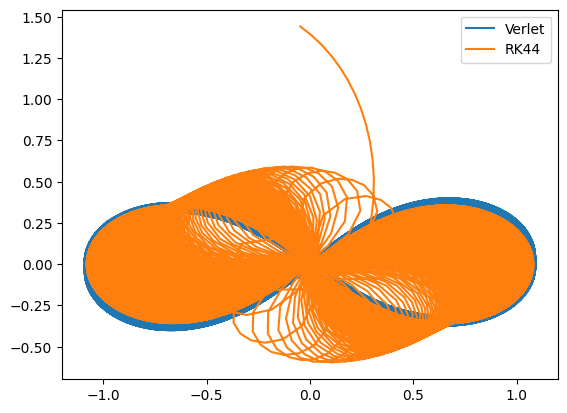

In [30]:
from auxiliares.ncorpos import F_ncorpos, valores_iniciais_lemniscata
from auxiliares.rk4 import runge_kutta_44

m, r0, v0 = valores_iniciais_lemniscata()
t0, tf = 0, 436*6.3259

def F (t, x):
  q = int(len(x)/2)
  r,v = x[:q],x[q:]
  F_vec = np.zeros((len(x),3))
  F_vec[:q] = v[:]
  F_vec[q:] = F_ncorpos(m,r)[:]
  return F_vec

h = 0.1
n = int((tf - t0)/h)

x = np.concatenate([r0, v0])
x_k_rungekutta = runge_kutta_44(x, F, t0, tf, n)
x_k_rungekutta = list(zip(*x_k_rungekutta))
X_rk,Y_rk,_ = list(zip(*x_k_rungekutta[0]))

r_k_verlet, v_k_verlet = velocity_verlet(m, r0, v0, F_ncorpos, n, t0, tf)

# Captura a posicao do primeiro corpo
R = r_k_verlet[0]
X_verlet,Y_verlet,_ = list(zip(*R)) # n x 3 -> 3 x n

# Plota a trajetoria do primeiro corpo
plt.plot(X_verlet, Y_verlet, label=f"Verlet")
plt.plot(X_rk,Y_rk, label=f"RK44")
plt.scatter(X_rk[0],Y_rk[0], c="black")
plt.legend()
plt.show()

Repare como eles começam juntos e, apesar da maior ordem do método de Runge-Kutta, sua trajetória vai acumulando os erros até que na volta 436 (com $h=0.1$, no caso) o primeiro corpo é ejetado do sistema. Ao mesmo tempo, a trajetória do método de Verlet segue firme e forte, mesmo tendo errado mais desde o começo!

Vamos olhar para a energia total do sistema para ver o que ocorre:

In [37]:
from auxiliares.ncorpos import energia_total

posicoes_runge_kutta = list(zip(*x_k_rungekutta[:3]))
velocidades_runge_kutta = list(zip(*x_k_rungekutta[3:]))

posicoes_verlet = list(zip(*r_k_verlet))
velocidades_verlet = list(zip(*v_k_verlet))

energia_total_rungekutta = [energia_total([1,1,1], posicoes_runge_kutta[i], velocidades_runge_kutta[i]) for i in range(len(posicoes_runge_kutta))]
energia_total_verlet = [energia_total([1,1,1], posicoes_verlet[i], velocidades_verlet[i]) for i in range(len(posicoes_verlet))]

[]

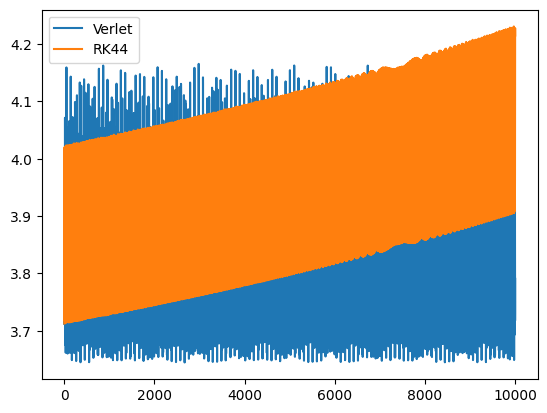

In [35]:
plt.plot(energia_total_verlet[:10000], label="Verlet")
plt.plot(energia_total_rungekutta[:10000], label="RK44")
plt.legend()
plt.plot()

Observe como no começo o erro do Runge-Kutta de fato é menor que o do Verlet. O seu problema é ser cumulativo! Olhando o todo, veja como ele explode:

[]

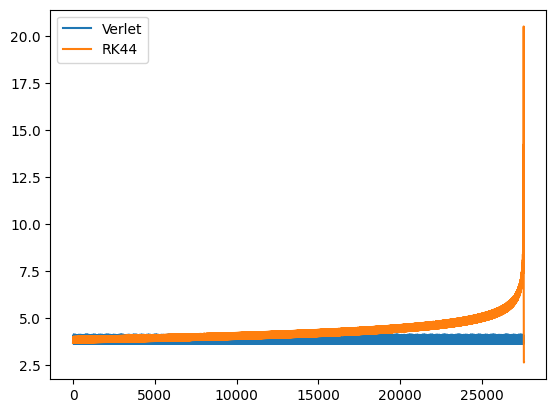

In [36]:
plt.plot(energia_total_verlet, label="Verlet")
plt.plot(energia_total_rungekutta, label="RK44")
plt.legend()
plt.plot()

Essa é a vantagem de um método simplético.